Loaded 18000 blob positions.


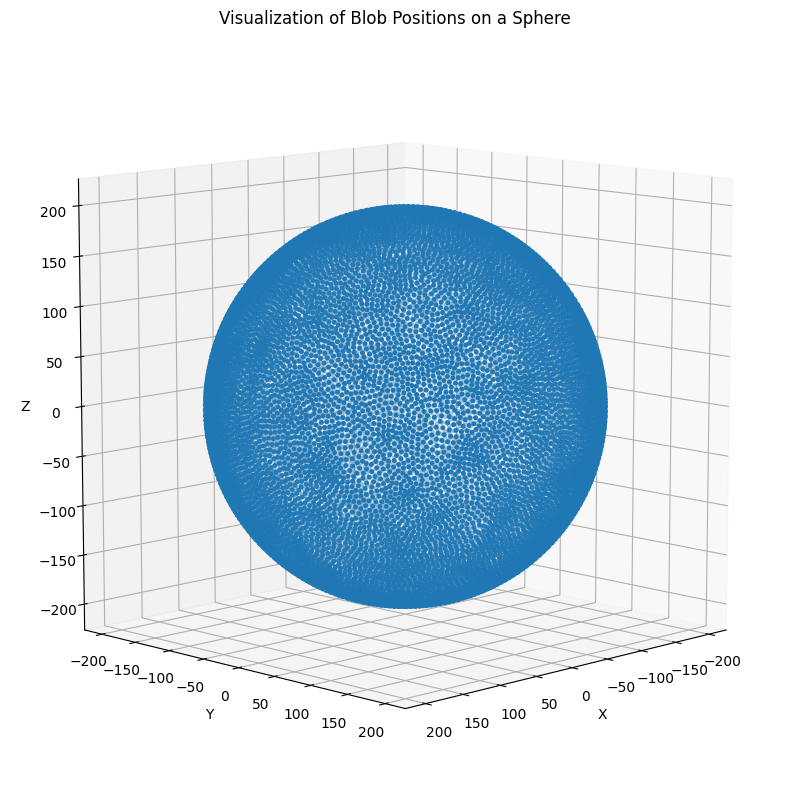

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = '../last_seedings/sphere18000.seed'

# Read the data from the file
try:
    with open(file_path, 'r') as f:
        data_str = f.read()

    # Convert the string of data to a numpy array
    data = np.fromstring(data_str, sep=' ')

    # Reshape the data into (N, 3) coordinates
    positions = data.reshape(-1, 3)

    # Scale the sphere from radius 0.5 to 197.6
    positions = positions * (197.6 / 0.5)

    print(f"Loaded {len(positions)} blob positions.")

    # --- Visualization Parameters ---
    viewer_elevation = 10  # Angle above the xy plane (e.g., 0 for side view, 90 for top view)
    viewer_azimuth = 45   # Rotation around the z-axis

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Calculate marker size to approximate a radius of 1 in data units.
    # This is an approximation as marker size is in points^2 (area).
    # We get the ratio of axis size in points to data range.
    # Figure DPI is assumed to be 72. Figure width is 10 inches * 72 dpi = 720 points.
    # Axes take up a fraction of the figure, let's say ~80%.
    axis_size_in_points = 0.8 * 10 * 72 
    data_range = np.ptp(positions[:,0])
    points_per_unit = axis_size_in_points / data_range
    marker_radius_in_points = 1.0 * points_per_unit
    marker_size_in_area = np.pi * (marker_radius_in_points**2)

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=marker_size_in_area)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Visualization of Blob Positions on a Sphere')

    # Set the view
    ax.view_init(elev=viewer_elevation, azim=viewer_azimuth)
    
    # Ensure aspect ratio is equal
    ax.set_box_aspect([np.ptp(positions[:, 0]), np.ptp(positions[:, 1]), np.ptp(positions[:, 2])])

    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [2]:
import numpy as np
from scipy.spatial import KDTree
from tqdm import tqdm

# --- Load and Prepare Data ---
# File path
file_path = '../last_seedings/sphere18000.seed'

try:
    with open(file_path, 'r') as f:
        data_str = f.read()

    # Convert the string of data to a numpy array
    data = np.fromstring(data_str, sep=' ')

    # Reshape the data into (N, 3) coordinates
    positions = data.reshape(-1, 3)

    # Scale the sphere from radius 0.5 to 197.6
    positions = positions * (197.6 / 0.5)
    
    print("Data loaded and scaled.")

    # --- Find Intersecting Blobs ---
    # The radius of each blob is 1, so they intersect if the distance between their centers is <= 2.
    blob_radius = 1.0
    intersection_distance = 2 * blob_radius

    # Use KDTree for efficient neighbor search
    print("Building KDTree...")
    kdtree = KDTree(positions)
    
    print(f"Finding pairs with distance <= {intersection_distance}...")
    intersecting_pairs = kdtree.query_pairs(r=intersection_distance)
    
    intersecting_pairs = sorted(list(intersecting_pairs))

    if intersecting_pairs:
        print(f"\nFound {len(intersecting_pairs)} intersecting pairs of blobs:")
        # Using tqdm for a progress bar if the list is long
        for pair in tqdm(intersecting_pairs, desc="Listing pairs"):
            print(f"Blob {pair[0]} and Blob {pair[1]}")
    else:
        print("\nNo intersecting blobs found.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded and scaled.
Building KDTree...
Finding pairs with distance <= 2.0...

No intersecting blobs found.


Data loaded and scaled.
Building KDTree for density calculation...
Calculating density at 360 points along the equator...


Calculating densities: 100%|██████████| 360/360 [00:00<00:00, 49902.49it/s]

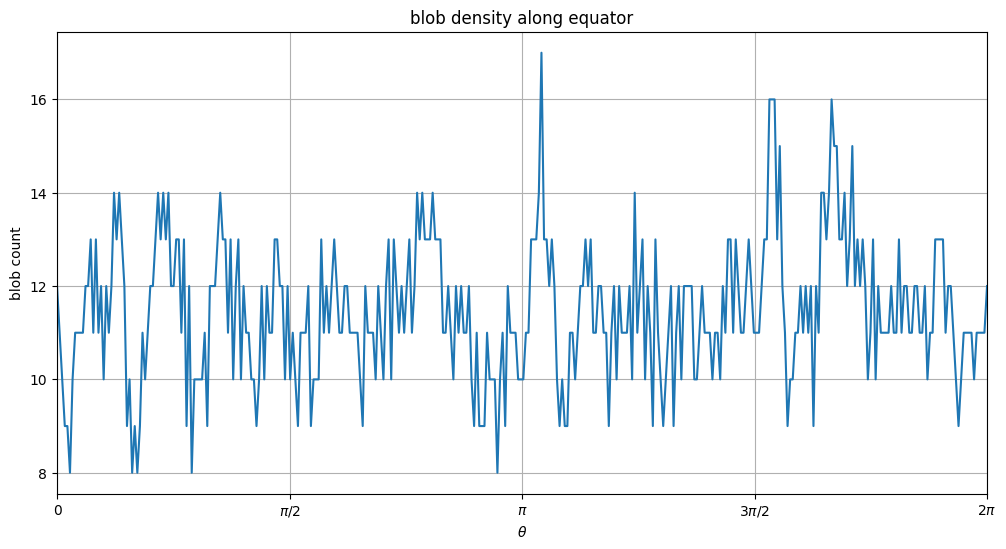

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from tqdm import tqdm

# --- Load and Prepare Data ---
# File path
file_path = '../last_seedings/sphere18000.seed'

try:
    with open(file_path, 'r') as f:
        data_str = f.read()

    # Convert the string of data to a numpy array
    data = np.fromstring(data_str, sep=' ')

    # Reshape the data into (N, 3) coordinates
    positions = data.reshape(-1, 3)

    # Scale the sphere from radius 0.5 to 197.6
    sphere_radius = 197.6
    positions = positions * (sphere_radius / 0.5)
    
    print("Data loaded and scaled.")

    # --- Calculate Blob Density along the Equator ---
    local_sphere_radius = 10.0
    
    # Build KDTree for efficient neighbor search
    print("Building KDTree for density calculation...")
    kdtree = KDTree(positions)
    
    # Define points along the equator
    num_theta_points = 360
    thetas = np.linspace(0, 2 * np.pi, num_theta_points)
    
    densities = []
    
    print(f"Calculating density at {num_theta_points} points along the equator...")
    for theta in tqdm(thetas, desc="Calculating densities"):
        # Get point on the equator
        equator_point = np.array([sphere_radius * np.cos(theta), sphere_radius * np.sin(theta), 0])
        
        # Find blobs within the local sphere
        indices = kdtree.query_ball_point(equator_point, r=local_sphere_radius)
        
        # The density is the number of blobs found
        densities.append(len(indices))
        
    # --- Plot the Density ---
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(thetas, densities)
    
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(f'blob count')
    ax.set_title('blob density along equator')
    ax.grid(True)
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
    ax.set_xlim(0, 2 * np.pi)
    
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded and scaled.
Building KDTree for density calculation...
Calculating density at 360 points along the equator...


Calculating densities: 100%|██████████| 360/360 [00:00<00:00, 63236.01it/s]

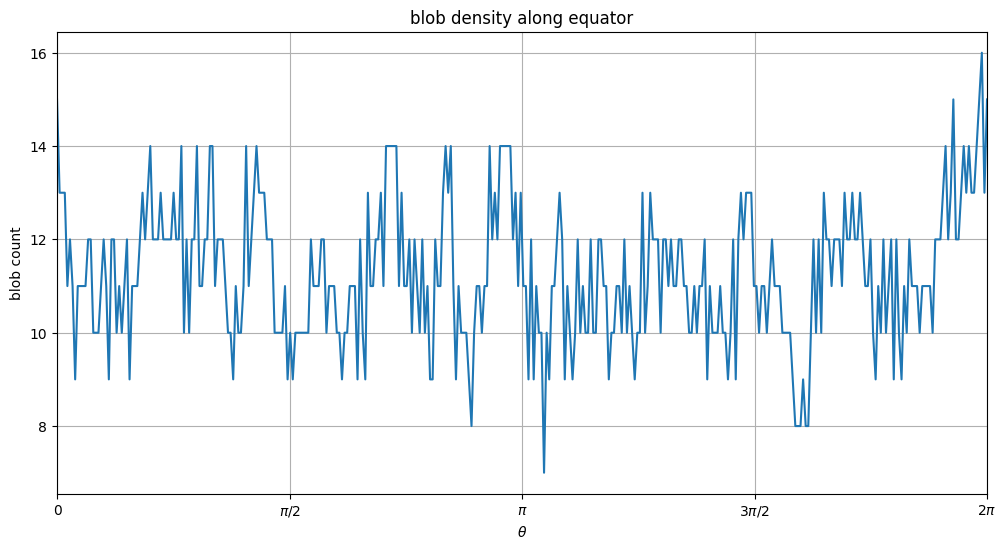

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from tqdm import tqdm

# --- Load and Prepare Data ---
# File path
file_path = '../input/fourier_modes/sphere18000.seed'

try:
    with open(file_path, 'r') as f:
        data_str = f.read()

    # Convert the string of data to a numpy array
    data = np.fromstring(data_str, sep=' ')

    # Reshape the data into (N, 3) coordinates
    positions = data.reshape(-1, 3)

    # Scale the sphere from radius 0.5 to 197.6
    sphere_radius = 197.6
    positions = positions * (sphere_radius / 0.5)
    
    print("Data loaded and scaled.")

    # --- Calculate Blob Density along the Equator ---
    local_sphere_radius = 10.0
    
    # Build KDTree for efficient neighbor search
    print("Building KDTree for density calculation...")
    kdtree = KDTree(positions)
    
    # Define points along the equator
    num_theta_points = 360
    thetas = np.linspace(0, 2 * np.pi, num_theta_points)
    
    densities = []
    
    print(f"Calculating density at {num_theta_points} points along the equator...")
    for theta in tqdm(thetas, desc="Calculating densities"):
        # Get point on the equator
        equator_point = np.array([sphere_radius * np.cos(theta), sphere_radius * np.sin(theta), 0])
        
        # Find blobs within the local sphere
        indices = kdtree.query_ball_point(equator_point, r=local_sphere_radius)
        
        # The density is the number of blobs found
        densities.append(len(indices))
        
    # --- Plot the Density ---
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(thetas, densities)
    
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(f'blob count')
    ax.set_title('blob density along equator')
    ax.grid(True)
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
    ax.set_xlim(0, 2 * np.pi)
    
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

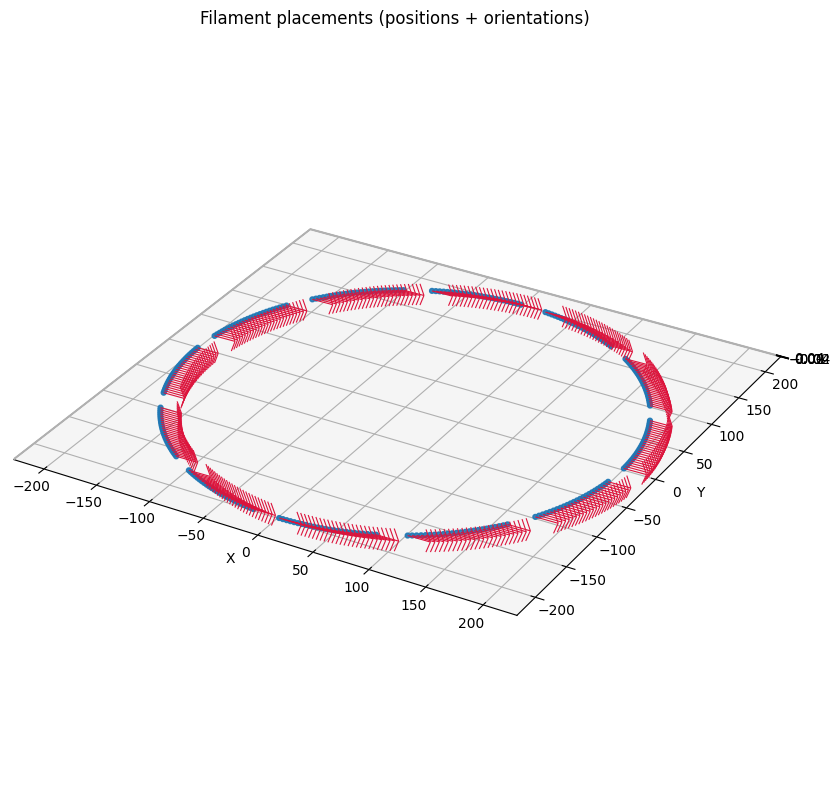

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize filament placements from the given references file

file_path = '../data/cell_gaps_1/20250901/ciliate_298fil_18000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_fil_references.dat'

try:

  with open(file_path, 'r') as f:
        data_str = f.read()

  # Convert the string of data to a numpy array
  data = np.fromstring(data_str, sep=' ')

  # Reshape the data into (N, 3) coordinates
  ref_positions = data.reshape(-1, 3)

  # Setup 3D plot
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Scatter positions
  ax.scatter(ref_positions[:, 0], ref_positions[:, 1], ref_positions[:, 2],
         s=12, alpha=0.9)

  # If orientation/direction vectors are present, draw them as arrows
  # if raw.shape[1] >= 6:
  #   dirs = raw[:, 3:6]
  #   # Scale arrows relative to data extent
  #   extents = np.ptp(ref_positions, axis=0)
  #   max_extent = float(np.max(extents)) if np.max(extents) > 0 else 1.0
  #   target_len = 0.05 * max_extent  # 5% of the scene size

  #   norms = np.linalg.norm(dirs, axis=1)
  #   scale = np.where(norms > 0, target_len / norms, 0.0)[:, None]
  #   U, V, W = (dirs * scale).T

  #   ax.quiver(ref_positions[:, 0], ref_positions[:, 1], ref_positions[:, 2],
  #         U, V, W, length=1.0, normalize=False, color='crimson',
  #         linewidth=0.8, arrow_length_ratio=0.2)

  # Labels and aesthetics
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Filament placements (positions' + (' + orientations' if raw.shape[1] >= 6 else '') + ')')

  # Equal aspect ratio
  span = np.ptp(ref_positions, axis=0)
  span = np.where(span == 0, 1.0, span)  # avoid zeros
  ax.set_box_aspect(span)

  plt.show()

except FileNotFoundError:
  print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
  print(f"An error occurred: {e}")